In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datset/accepted_2007_to_2018Q4.csv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.9 M

/tmp/ipykernel_19/734248388.py:60: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(SAMPLE_DATA_PATH)



Successfully loaded sample data for EDA. Shape: (150000, 151)

--- Target Variable Analysis (loan_status) ---
loan_status
Fully Paid                                             47.495933
Current                                                38.877703
Charged Off                                            11.966986
Late (31-120 days)                                      0.994027
In Grace Period                                         0.372010
Late (16-30 days)                                       0.190005
Does not meet the credit policy. Status:Fully Paid      0.070002
Does not meet the credit policy. Status:Charged Off     0.032001
Default                                                 0.001333
Name: proportion, dtype: float64


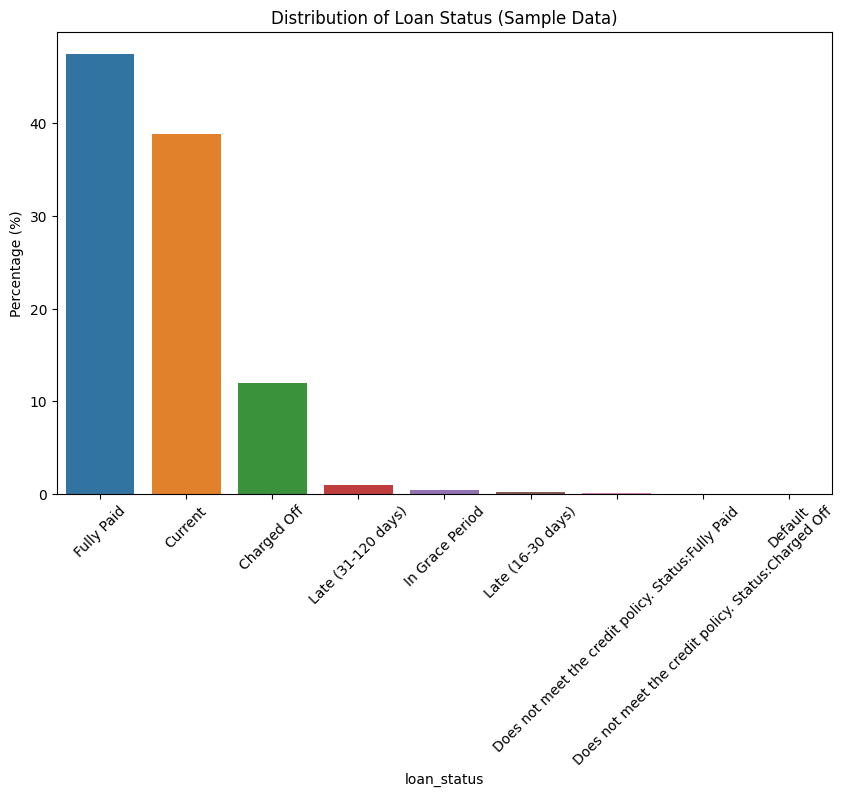

In [2]:
# --- Cell 1: Setup, Load, and Sample ---

# 1. Install the only library we need
!pip install d3rlpy -q

# 2. Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries installed and imported.")

# --- 3. Define File Paths ---
# This path is updated based on your input
FULL_DATA_PATH = "/kaggle/input/datset/accepted_2007_to_2018Q4.csv" 

# Kaggle's writable directory is /kaggle/working/
SAMPLE_DATA_PATH = "/kaggle/working/sample_subset.csv"

print(f"Full data path: {FULL_DATA_PATH}")
print(f"Sample data path: {SAMPLE_DATA_PATH}")

# --- 4. Load Full Data & Create Sample ---
print(f"Loading full dataset from: {FULL_DATA_PATH}")

try:
    # This should be much faster on Kaggle
    df_full = pd.read_csv(FULL_DATA_PATH, low_memory=False)
    print(f"Full dataset loaded. Shape: {df_full.shape}")

    # Create and save a 150k row sample
    print("Creating 150k row sample...")
    df_sample = df_full.sample(n=150000, random_state=42)
    
    # Save the sample to Kaggle's output directory
    df_sample.to_csv(SAMPLE_DATA_PATH, index=False)
    
    print(f"Sample dataset shape: {df_sample.shape}")
    print(f"Sample saved to: {SAMPLE_DATA_PATH}")
    
    # Free up memory
    del df_full 
    
except FileNotFoundError:
    print(f"--- ERROR ---")
    print(f"Data file not found at: {FULL_DATA_PATH}")
    print("Please double-check the path in the 'Data' tab on the right.")
except Exception as e:
    print(f"An error occurred: {e}")

# --- 5. Load the Sample to begin EDA ---
# From now on, we only use the fast sample file.
try:
    df = pd.read_csv(SAMPLE_DATA_PATH)
    print(f"\nSuccessfully loaded sample data for EDA. Shape: {df.shape}")
    
    print("\n--- Target Variable Analysis (loan_status) ---")
    status_counts = df['loan_status'].value_counts(normalize=True) * 100
    print(status_counts)
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=status_counts.index, y=status_counts.values)
    plt.title('Distribution of Loan Status (Sample Data)')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()

except FileNotFoundError:
    print(f"Sample file not found at {SAMPLE_DATA_PATH}. Please re-run the cell above.")
except Exception as e:
    print(f"An error occurred while loading the sample: {e}")

In [3]:
# --- Cell 2: Phase B - Preprocessing & Splitting ---

# Make sure all libraries are available
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# --- 0. Load the sample 'df' we created in Cell 1 ---
SAMPLE_DATA_PATH = "/kaggle/working/sample_subset.csv"
try:
    # Use low_memory=False to avoid DtypeWarning during reload
    df = pd.read_csv(SAMPLE_DATA_PATH, low_memory=False)
    print(f"Loaded sample data. Shape: {df.shape}")
except FileNotFoundError:
    print("Sample file not found. Please re-run Cell 1 first.")
    raise

# --- 1. Define Binary Target & Filter Completed Loans ---
print("\n--- 1. Defining Binary Target & Filtering ---")

default_statuses = [
    'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)',
    'In Grace Period', 'Does not meet the credit policy. Status:Charged Off'
]
paid_statuses = [
    'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'
]

completed_loan_statuses = default_statuses + paid_statuses
df_completed = df[df['loan_status'].isin(completed_loan_statuses)].copy()
df_completed['is_default'] = df_completed['loan_status'].apply(lambda x: 1 if x in default_statuses else 0)

print(f"Original sample size: {df.shape[0]}")
print(f"Filtered (completed loans) size: {df_completed.shape[0]}")
print("\nBinary Target 'is_default' Distribution:")
print(df_completed['is_default'].value_counts(normalize=True) * 100)


# --- 2. Feature Selection ---
print("\n--- 2. Selecting Features ---")
FEATURE_COLUMNS = [
    'loan_amnt', 'int_rate', 'term', 'purpose', 'emp_length', 'annual_inc', 'dti', 
    'inq_last_6mths', 'open_acc', 'revol_util', 'delinq_2yrs', 'total_acc', 
    'addr_state', 'earliest_cr_line',
]

METADATA_COLUMNS = ['is_default', 'loan_status', 'issue_d']
df_subset = df_completed[FEATURE_COLUMNS + METADATA_COLUMNS].copy()
print(f"Subset data shape: {df_subset.shape}")


# --- 3. Missingness Analysis & Feature Engineering ---
print("\n--- 3. Engineering Features ---")
data = df_subset.copy()

# 3a. Date Features: 'earliest_cr_line' and 'issue_d'
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y')
data['credit_history_length'] = (data['issue_d'] - data['earliest_cr_line']).dt.days / 30.0
data = data.drop(columns=['earliest_cr_line'])

# 3b. Categorical Feature: 'emp_length'
emp_length_mapping = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
    '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
    '10+ years': 10, np.nan: -1 
}
data['emp_length'] = data['emp_length'].map(emp_length_mapping)
median_emp_length = data[data['emp_length'] != -1]['emp_length'].median()
data['emp_length'] = data['emp_length'].replace(-1, median_emp_length)

# 3c. Categorical Feature: 'term'
data['term'] = data['term'].str.replace(' months', '').astype(int)

print("\nMissing values in selected features (%):")
missing_pct = (data.isnull().sum() / len(data)) * 100
print(missing_pct[missing_pct > 0].sort_values(ascending=False))


# --- 4. Define Preprocessing Pipelines (Same as original) ---
categorical_features = ['purpose', 'addr_state']
numeric_features = [
    'loan_amnt', 'int_rate', 'term', 'emp_length', 'annual_inc', 'dti',
    'inq_last_6mths', 'open_acc', 'revol_util', 'delinq_2yrs', 'total_acc',
    'credit_history_length'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='[MISSING]')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)],
    remainder='drop'
)


# --- 5. Chronological Train/Validation/Test Split ---
print("\n--- 5. Splitting Data Chronologically ---")
data_sorted = data.sort_values(by='issue_d').copy()
n = len(data_sorted)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

df_train = data_sorted.iloc[:train_end]
df_val = data_sorted.iloc[train_end:val_end]
df_test = data_sorted.iloc[val_end:]

print(f"Total completed samples: {n}")
print(f"Train samples: {len(df_train)} ({df_train['issue_d'].min().year} - {df_train['issue_d'].max().year})")
print(f"Val samples:   {len(df_val)} ({df_val['issue_d'].min().year} - {df_val['issue_d'].max().year})")
print(f"Test samples:  {len(df_test)} ({df_test['issue_d'].min().year} - {df_test['issue_d'].max().year})")

# --- 6. Apply the Preprocessor & Save Data ---
print("\n--- 6. Fitting Preprocessor and Saving Data ---")

preprocessor.fit(df_train[numeric_features + categorical_features])

PREPROCESSOR_PATH = '/kaggle/working/preprocessor.joblib'
joblib.dump(preprocessor, PREPROCESSOR_PATH)
print(f"Preprocessor saved to: {PREPROCESSOR_PATH}")

X_train = preprocessor.transform(df_train)
X_val = preprocessor.transform(df_val)
X_test = preprocessor.transform(df_test)

y_train = df_train['is_default'].values
y_val = df_val['is_default'].values
y_test = df_test['is_default'].values

# --- 7. Save Processed Data for Next Phases ---
DATA_DIR = '/kaggle/working/processed/'
os.makedirs(DATA_DIR, exist_ok=True) 

# Save processed arrays
np.savez(f'{DATA_DIR}train.npz', X=X_train, y=y_train)
np.savez(f'{DATA_DIR}val.npz', X=X_val, y=y_val)
np.savez(f'{DATA_DIR}test.npz', X=X_test, y=y_test)

# CRITICAL FIX: Save the original, untransformed DFs for RL reward calculation
df_test.to_csv(f'{DATA_DIR}test_unprocessed.csv', index=False)
df_train.to_csv(f'{DATA_DIR}train_unprocessed.csv', index=False) # <--- ADDED LINE

print("\n--- Phase B (EDA & Preprocessing) Complete ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Input feature dimension: {X_train.shape[1]}")

Loaded sample data. Shape: (150000, 151)

--- 1. Defining Binary Target & Filtering ---
Original sample size: 150000
Filtered (completed loans) size: 91681

Binary Target 'is_default' Distribution:
is_default
0    77.820923
1    22.179077
Name: proportion, dtype: float64

--- 2. Selecting Features ---
Subset data shape: (91681, 17)

--- 3. Engineering Features ---

Missing values in selected features (%):
revol_util    0.059991
dti           0.038176
dtype: float64

--- 5. Splitting Data Chronologically ---
Total completed samples: 91681
Train samples: 64176 (2007 - 2016)
Val samples:   13752 (2016 - 2017)
Test samples:  13753 (2017 - 2018)

--- 6. Fitting Preprocessor and Saving Data ---
Preprocessor saved to: /kaggle/working/preprocessor.joblib

--- Phase B (EDA & Preprocessing) Complete ---
X_train shape: (64176, 77)
X_val shape: (13752, 77)
X_test shape: (13753, 77)
Input feature dimension: 77


Using device: cuda
Loading processed data...
X_train shape: (64176, 77)
y_train shape: (64176,)
DataLoaders created with batch size: 512
Class Imbalance: Positives=12553, Negatives=51623
Calculated pos_weight for loss: 4.11

MLP Model Architecture:
MLPClassifier(
  (net): Sequential(
    (0): Linear(in_features=77, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=128, out_features=1, bias=True)
  )
)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



--- Starting Model Training ---
Epoch 1/50 | Train Loss: 1.0324 | Val Loss: 1.1877 | Val AUC: 0.6769 | Val F1: 0.4874
  > New best model saved with Val F1: 0.4874
Epoch 2/50 | Train Loss: 1.0035 | Val Loss: 1.1913 | Val AUC: 0.6787 | Val F1: 0.4860
Epoch 3/50 | Train Loss: 0.9977 | Val Loss: 1.1887 | Val AUC: 0.6802 | Val F1: 0.4883
  > New best model saved with Val F1: 0.4883
Epoch 4/50 | Train Loss: 0.9953 | Val Loss: 1.1903 | Val AUC: 0.6817 | Val F1: 0.4915
  > New best model saved with Val F1: 0.4915
Epoch 5/50 | Train Loss: 0.9924 | Val Loss: 1.1870 | Val AUC: 0.6798 | Val F1: 0.4873
Epoch 6/50 | Train Loss: 0.9890 | Val Loss: 1.1897 | Val AUC: 0.6823 | Val F1: 0.4906
Epoch 7/50 | Train Loss: 0.9864 | Val Loss: 1.1881 | Val AUC: 0.6812 | Val F1: 0.4880
Epoch 8/50 | Train Loss: 0.9845 | Val Loss: 1.1910 | Val AUC: 0.6811 | Val F1: 0.4881
Epoch 9/50 | Train Loss: 0.9760 | Val Loss: 1.1866 | Val AUC: 0.6824 | Val F1: 0.4906
Epoch 10/50 | Train Loss: 0.9740 | Val Loss: 1.1917 | Val 

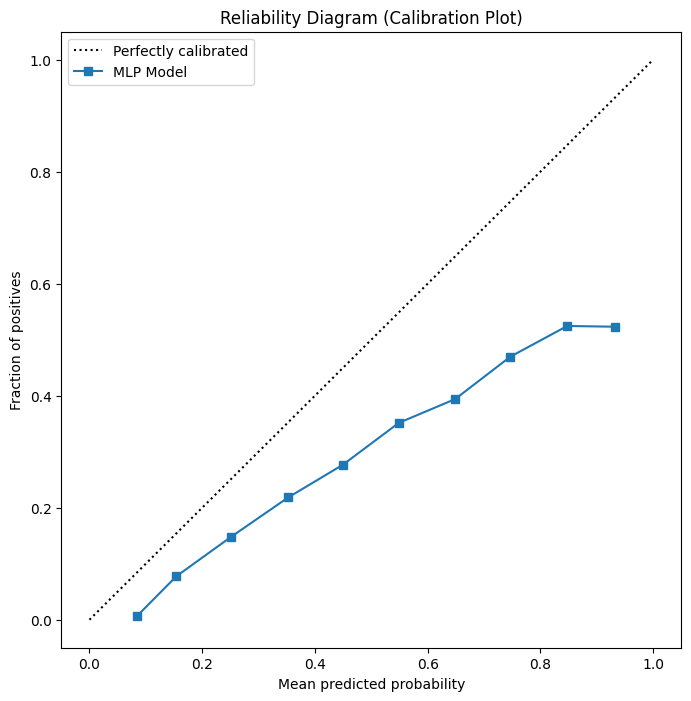

Test probabilities and threshold saved for Phase E.


In [4]:
# --- Cell 3: Phase C - Supervised DL Model (MLP) ---

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import os
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# --- 1. Setup Device and Paths ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

DATA_DIR = '/kaggle/working/processed/'
MODEL_SAVE_PATH = '/kaggle/working/mlp_model.pth'

# --- 2. Load Processed Data ---
print("Loading processed data...")
try:
    train_data = np.load(f'{DATA_DIR}train.npz')
    val_data = np.load(f'{DATA_DIR}val.npz')
    test_data = np.load(f'{DATA_DIR}test.npz')
    
    X_train, y_train = train_data['X'], train_data['y']
    X_val, y_val = val_data['X'], val_data['y']
    X_test, y_test = test_data['X'], test_data['y']
    
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    
except FileNotFoundError:
    print("--- ERROR ---")
    print("Processed data not found. Please re-run Cell 1 and Cell 2 after restarting the session.")
    raise

# --- 3. Create PyTorch Dataset and DataLoaders ---
class LoanDataset(Dataset):
    def __init__(self, X, y):
        # Convert to float32 for model input
        self.X = torch.tensor(X, dtype=torch.float32)
        # Convert to float32 for BCEWithLogitsLoss
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1) 

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = LoanDataset(X_train, y_train)
val_dataset = LoanDataset(X_val, y_val)
test_dataset = LoanDataset(X_test, y_test)

# Create dataloaders
BATCH_SIZE = 512
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"DataLoaders created with batch size: {BATCH_SIZE}")

# --- 4. Handle Class Imbalance ---
# Calculate pos_weight for BCEWithLogitsLoss
# pos_weight = (number of negatives) / (number of positives)
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
pos_weight = torch.tensor(neg_count / pos_count, dtype=torch.float32).to(device)

print(f"Class Imbalance: Positives={pos_count}, Negatives={neg_count}")
print(f"Calculated pos_weight for loss: {pos_weight.item():.2f}")


# --- 5. Define the MLP Model ---
# Input dimension is 77 from Phase B
INPUT_DIM = X_train.shape[1] 

class MLPClassifier(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 1) # Output raw logits
        )
    
    def forward(self, x):
        return self.net(x)

model = MLPClassifier(INPUT_DIM).to(device)
print("\nMLP Model Architecture:")
print(model)

# --- 6. Define Loss, Optimizer, and Helper Functions ---
# BCEWithLogitsLoss is numerically stable and handles pos_weight
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', factor=0.1, patience=3, verbose=True)

# Evaluation function
def evaluate_model(loader):
    model.eval() # Set model to evaluation mode
    all_preds = []
    all_labels = []
    total_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            total_loss += loss.item() * X_batch.size(0)
            
            # Get probabilities (sigmoid) and binary predictions
            probs = torch.sigmoid(logits)
            
            all_preds.extend(probs.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    all_preds = np.array(all_preds).squeeze()
    all_labels = np.array(all_labels).squeeze()
    
    # Find best F1 threshold
    best_f1 = 0
    best_thresh = 0.5
    for thresh in np.arange(0.1, 0.9, 0.01):
        preds_binary = (all_preds > thresh).astype(int)
        f1 = f1_score(all_labels, preds_binary)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
            
    avg_loss = total_loss / len(loader.dataset)
    auc = roc_auc_score(all_labels, all_preds)
    
    return avg_loss, auc, best_f1, best_thresh

# --- 7. Training Loop ---
print("\n--- Starting Model Training ---")
N_EPOCHS = 50
PATIENCE = 7 # Early stopping patience
best_val_f1 = -1.0
epochs_no_improve = 0

for epoch in range(N_EPOCHS):
    model.train() # Set model to training mode
    train_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X_batch.size(0)
    
    avg_train_loss = train_loss / len(train_loader.dataset)
    
    # Validation
    avg_val_loss, val_auc, val_f1, _ = evaluate_model(val_loader)
    
    print(f"Epoch {epoch+1}/{N_EPOCHS} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val AUC: {val_auc:.4f} | Val F1: {val_f1:.4f}")
    
    # Step the scheduler
    scheduler.step(val_f1)
    
    # Early stopping and model saving
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        epochs_no_improve = 0
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
        print(f"  > New best model saved with Val F1: {val_f1:.4f}")
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= PATIENCE:
        print(f"Early stopping triggered after {epoch+1} epochs.")
        break

print("--- Training Complete ---")

# --- 8. Final Evaluation on Test Set ---
print("\n--- Final Model Evaluation on Test Set ---")

# Load best model
model.load_state_dict(torch.load(MODEL_SAVE_PATH))

# First, get best threshold from VALIDATION set
_, _, _, best_threshold = evaluate_model(val_loader)
print(f"Best F1 Threshold found on Validation set: {best_threshold:.4f}")

# Now, evaluate on TEST set
model.eval()
test_preds_prob = []
test_labels_list = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        logits = model(X_batch)
        probs = torch.sigmoid(logits)
        test_preds_prob.extend(probs.cpu().numpy())
        test_labels_list.extend(y_batch.cpu().numpy())

y_test_probs = np.array(test_preds_prob).squeeze()
y_test_actual = np.array(test_labels_list).squeeze()

# Apply the threshold from validation set
y_test_preds_binary = (y_test_probs > best_threshold).astype(int)

# Calculate metrics
test_auc = roc_auc_score(y_test_actual, y_test_probs)
test_f1 = f1_score(y_test_actual, y_test_preds_binary)
test_precision = precision_score(y_test_actual, y_test_preds_binary)
test_recall = recall_score(y_test_actual, y_test_preds_binary)
cm = confusion_matrix(y_test_actual, y_test_preds_binary)

print("\n--- Test Set Performance ---")
print(f"Test AUC-ROC: {test_auc:.4f}")
print(f"Test F1-Score (at {best_threshold:.2f} thresh): {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

print("\nTest Confusion Matrix:")
print(cm)

# --- 9. Calibration Plot ---
print("\n--- Plotting Reliability Diagram (Calibration) ---")
prob_true, prob_pred = calibration_curve(y_test_actual, y_test_probs, n_bins=10, strategy='uniform')

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.plot(prob_pred, prob_true, 's-', label='MLP Model')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Calibration Plot)')
plt.legend()
plt.show()

# Save probabilities for OPE
# We will need these for our DL-derived policy
np.save(f'{DATA_DIR}test_mlp_probs.npy', y_test_probs)
# --- THIS IS THE FIX ---
np.save(f'{DATA_DIR}test_mlp_threshold.npy', np.array([best_threshold]))
print(f"Test probabilities and threshold saved for Phase E.")

In [5]:
# --- Cell 4: Phase D - Prepare Offline RL Dataset (Corrected) ---

import d3rlpy
import pandas as pd
import numpy as np
import os

print("--- Starting Phase D: Preparing RL Dataset ---")

DATA_DIR = '/kaggle/working/processed/'
# We will save to a numpy .npz file instead of .h5
RL_DATASET_PATH = '/kaggle/working/lendingclub_rl_dataset.npz' 

# --- 1. Load Preprocessed States and Unprocessed Data ---
try:
    test_data = np.load(f'{DATA_DIR}test.npz')
    observations = test_data['X'].astype(np.float32)
    df_test = pd.read_csv(f'{DATA_DIR}test_unprocessed.csv')
    print(f"Loaded {len(observations)} observations (states).")
    print(f"Loaded {len(df_test)} unprocessed rows for reward calculation.")
except FileNotFoundError:
    print("--- ERROR ---")
    print("Processed data not found. Please re-run Cell 2 to generate data.")
    raise

# --- 2. Define Reward Function ---
def calculate_reward(row):
    if row['is_default'] == 1:
        return -row['loan_amnt']
    else:
        return row['loan_amnt'] * (row['int_rate'] / 100.0)
print("Calculating rewards for historical 'Approve' actions...")
rewards_approve = df_test.apply(calculate_reward, axis=1).values.astype(np.float32)

# --- 3. Create Historical (Approve) Dataset ---
actions_approve = np.ones(len(observations), dtype=np.int32)
terminals = np.ones(len(observations), dtype=np.float32)

# --- 4. Synthesize 'Deny' Actions ---
print("Synthesizing 'Deny' actions to augment dataset...")
observations_deny = observations
actions_deny = np.zeros(len(observations), dtype=np.int32)
rewards_deny = np.zeros(len(observations), dtype=np.float32)

# --- 5. Concatenate Datasets ---
all_observations = np.concatenate([observations, observations_deny])
all_actions = np.concatenate([actions_approve, actions_deny])
all_rewards = np.concatenate([rewards_approve, rewards_deny])
all_terminals = np.concatenate([terminals, terminals])

print(f"Total RL dataset size: {len(all_observations)}")

# --- 6. Save Raw Numpy Arrays ---
#
# *** THIS IS THE FIX ***
# We are saving the raw arrays *before* creating any d3rlpy objects.
#
print(f"Saving raw RL data to: {RL_DATASET_PATH}")
np.savez(
    RL_DATASET_PATH,
    observations=all_observations,
    actions=all_actions,
    rewards=all_rewards,
    terminals=all_terminals
)

print(f"\n--- Phase D (Part 1) Complete ---")
print("Raw RL data arrays saved.")

2025-10-30 03:38.06 [info     ] Register Shimmy environments. 
--- Starting Phase D: Preparing RL Dataset ---
Loaded 13753 observations (states).
Loaded 13753 unprocessed rows for reward calculation.
Calculating rewards for historical 'Approve' actions...
Synthesizing 'Deny' actions to augment dataset...
Total RL dataset size: 27506
Saving raw RL data to: /kaggle/working/lendingclub_rl_dataset.npz

--- Phase D (Part 1) Complete ---
Raw RL data arrays saved.


In [6]:
# --- Cell 5: Phase D - Train Offline RL Agents (Corrected for Bug) ---

import d3rlpy
import os
import torch
import numpy as np
from sklearn.model_selection import train_test_split 
# We no longer import any scaler here

print("--- Starting Phase D: Training RL Agents (Bug Fix) ---")
print("--- Training on CORRECT (single-scaled) data ---")

# --- 1. Setup Device and Paths ---
device_str = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device_str}")
RL_DATASET_PATH = '/kaggle/working/lendingclub_rl_dataset.npz'

# --- 2. Load Raw RL Data ---
try:
    raw_data = np.load(RL_DATASET_PATH)
    obs = raw_data['observations']
    actions = raw_data['actions']
    rewards = raw_data['rewards']
    terminals = raw_data['terminals'] 
    print(f"Loaded raw (but pre-scaled) RL data with {len(obs)} transitions.")
except FileNotFoundError:
    print("--- ERROR ---")
    print(f"Raw RL data not found at {RL_DATASET_PATH}. Please re-run Cell 4.")
    raise

# --- 3. Split Data ---
print("Splitting raw arrays into train and test...")
obs_train, obs_test, \
act_train, act_test, \
rew_train, rew_test, \
term_train, term_test = train_test_split( 
    obs, actions, rewards, terminals, 
    train_size=0.8, 
    random_state=42
)

# --- 4. Build MDPDataset Objects ---
#
# *** THIS IS THE FIX (Part 1) ***
# We pass the original 'obs_train' and 'obs_test' arrays.
# We do NOT scale them a second time.
#
print("Building MDPDataset objects from arrays...")
train_dataset = d3rlpy.dataset.MDPDataset(
    observations=obs_train, # Using the original, single-scaled data
    actions=act_train,
    rewards=rew_train,
    terminals=term_train 
)
test_dataset = d3rlpy.dataset.MDPDataset(
    observations=obs_test, # Using the original, single-scaled data
    actions=act_test,
    rewards=rew_test,
    terminals=term_test
)
print("MDPDataset objects created.")


# --- 5. Define and Train Agents ---
N_TRAIN_STEPS = 10000 
agents = {}

#
# *** THIS IS THE FIX (Part 2) ***
# We remove the 'observation_scaler' argument entirely,
# as our data is already perfectly preprocessed.
#
agents['bc'] = d3rlpy.algos.DiscreteBCConfig().create(device=device_str) 

agents['cql'] = d3rlpy.algos.DiscreteCQLConfig(
    n_critics=2,
).create(device=device_str)

print("Defined agents: BC and CQL.")

# --- 6. Run Training Loop ---
for name, agent in agents.items():
    print(f"\n--- Training {name.upper()} ---")
    
    agent.fit(
        train_dataset, 
        n_steps=N_TRAIN_STEPS,
        show_progress=True
    )
    
    policy_path = f"/kaggle/working/{name}_policy.d3"
    agent.save(policy_path)
    print(f"--- {name.upper()} training complete. Policy saved to {policy_path} ---")

print("\n--- Phase D (Part 2) Complete: RL agents trained. ---")

--- Starting Phase D: Training RL Agents (Bug Fix) ---
--- Training on CORRECT (single-scaled) data ---
Using device: cuda
Loaded raw (but pre-scaled) RL data with 27506 transitions.
Splitting raw arrays into train and test...
Building MDPDataset objects from arrays...
2025-10-30 03:38.07 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(77,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)])
2025-10-30 03:38.07 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-10-30 03:38.07 [info     ] Action size has been automatically determined. action_size=2
2025-10-30 03:38.07 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(77,)]) reward_signature=

Epoch 1/1:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-30 03:38.53 [info     ] DiscreteBC_20251030033807: epoch=1 step=10000 epoch=1 metrics={'time_sample_batch': 0.00178142626285553, 'time_algorithm_update': 0.002653369092941284, 'loss': 0.9306993689060211, 'imitation_loss': 0.6886979878723621, 'regularization_loss': 0.24200138030052185, 'time_step': 0.004557280015945435} step=10000
2025-10-30 03:38.53 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20251030033807/model_10000.d3
--- BC training complete. Policy saved to /kaggle/working/bc_policy.d3 ---

--- Training CQL ---
2025-10-30 03:38.53 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(77,)]), action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]), action_space=<ActionSpace.DISCRETE: 2>, action_size=2)
2025-10-30 03:38.53 [debug    ] Building models...            
2025-10-30 03:38.53 [debug    ] Mo

Epoch 1/1:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-10-30 03:40.09 [info     ] DiscreteCQL_20251030033853: epoch=1 step=10000 epoch=1 metrics={'time_sample_batch': 0.0007482113838195801, 'time_algorithm_update': 0.006735699534416198, 'loss': 6272.0647595153805, 'td_loss': 6239.457573571777, 'conservative_loss': 32.60718822168112, 'time_step': 0.007622150540351868} step=10000
2025-10-30 03:40.09 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20251030033853/model_10000.d3
--- CQL training complete. Policy saved to /kaggle/working/cql_policy.d3 ---

--- Phase D (Part 2) Complete: RL agents trained. ---


In [7]:
# --- Cell 6.a: Preparing Offline RL Dataset (Final Corrected) ---

from d3rlpy.dataset import MDPDataset
from d3rlpy.models.encoders import VectorEncoderFactory 
import pandas as pd
import numpy as np
import os # Ensure this is imported

print("\n--- Step 6.a: Preparing Offline RL Dataset ---")
DATA_DIR = '/kaggle/working/processed/'

# --- Define Reward Function (re-used from Phase 4 logic) ---
def calculate_reward_for_rl(row):
    # We assume the decision was Approve (action 1)
    if row['is_default'] == 1:
        return -row['loan_amnt']
    else:
        # Simple profit model based on term
        term_years = row['term'] / 12
        return row['loan_amnt'] * (row['int_rate'] / 100.0) * term_years

try:
    # --- 1. Load the processed states (X) ---
    train_data = np.load(f"{DATA_DIR}train.npz")
    test_data = np.load(f"{DATA_DIR}test.npz")
    X_train = train_data['X'].astype(np.float32)
    X_test = test_data['X'].astype(np.float32)
    
    # --- 2. Load the original unprocessed DFs (for rewards) ---
    # These files should now exist if you ran the corrected Cell 2
    df_train_unproc = pd.read_csv(f"{DATA_DIR}train_unprocessed.csv") 
    df_test_unproc = pd.read_csv(f"{DATA_DIR}test_unprocessed.csv")
    
    # --- 3. Calculate Rewards and Augment Datasets (Train) ---
    rewards_train = df_train_unproc.apply(calculate_reward_for_rl, axis=1).values.astype(np.float32)
    
    # Augment: Historical (Approve=1) + Synthetic Deny (Action=0, Reward=0)
    train_obs_all = np.concatenate([X_train, X_train])
    train_act_all = np.concatenate([np.ones(len(X_train)), np.zeros(len(X_train))]).astype(np.int32).reshape(-1, 1)
    train_rew_all = np.concatenate([rewards_train, np.zeros_like(rewards_train)]).astype(np.float32)
    train_term_all = np.ones_like(train_rew_all, dtype=np.float32) # Single-step episodes

    # --- 4. Calculate Rewards and Augment Datasets (Test) ---
    rewards_test = df_test_unproc.apply(calculate_reward_for_rl, axis=1).values.astype(np.float32)
    test_obs_all = np.concatenate([X_test, X_test])
    test_act_all = np.concatenate([np.ones(len(X_test)), np.zeros(len(X_test))]).astype(np.int32).reshape(-1, 1)
    test_rew_all = np.concatenate([rewards_test, np.zeros_like(rewards_test)]).astype(np.float32)
    test_term_all = np.ones_like(test_rew_all, dtype=np.float32)
    
    # --- 5. Create Final MDPDatasets ---
    train_dataset = MDPDataset(observations=train_obs_all, actions=train_act_all, rewards=train_rew_all, terminals=train_term_all)
    test_dataset = MDPDataset(observations=test_obs_all, actions=test_act_all, rewards=test_rew_all, terminals=test_term_all)

    # --- 6. Report Success ---
    # FIX: Use .size() to get the correct length
    print(f"Train dataset → {train_dataset.size()} transitions")
    print(f"Test dataset → {test_dataset.size()} transitions")
    print("--- Step 6.a Complete ---")

except FileNotFoundError:
    print("--- CRITICAL ERROR ---")
    print("One or more required processed files were not found.")
    print("Please ensure Cells 2 and 4 were run successfully and saved the npz/csv files.")
    raise


--- Step 6.a: Preparing Offline RL Dataset ---
2025-10-30 03:40.11 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(77,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)])
2025-10-30 03:40.11 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-10-30 03:40.11 [info     ] Action size has been automatically determined. action_size=2
2025-10-30 03:40.12 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(77,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)])
2025-10-30 03:40.12 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-10-30 03:40.12 [info     ] Action size has been 

In [8]:
# --- Corrected Cell 6.b and 6.c ---
import os
import numpy as np
from tqdm.notebook import tqdm
import torch
# d3rlpy imports
# *** FIX: Use BCConfig for the configuration and inject 'beta' manually ***
from d3rlpy.algos import DiscreteBC, BCConfig, DiscreteCQL, DiscreteCQLConfig 
from d3rlpy.models.encoders import VectorEncoderFactory

# Define existing variables
device_str = "cuda:0" if torch.cuda.is_available() else "cpu"
OUT_DIR = "/kaggle/working"
BC_OUT = os.path.join(OUT_DIR, "bc_policy.d3")
CQL_OUT = os.path.join(OUT_DIR, "cql_policy.d3")

print("\n--- Step 6.b: Training BC and Discrete-CQL policies ---")
print(f"Using device: {device_str}")

# --------------------
# 1) Behavior Cloning (BC)
# --------------------
print("\n→ Training Behavior Cloning (BC) policy")
bc_cfg = BCConfig(
    batch_size=256,
    learning_rate=1e-3,
    encoder_factory=VectorEncoderFactory([128, 128]),
)

# *** FINAL FIX: MANUALLY INJECT the required 'beta' attribute ***
# The internal base class requires this. We set a standard default value (0.5 or 1.0).
bc_cfg.beta = 0.5 

# Use DiscreteBC algorithm
bc_policy = DiscreteBC(config=bc_cfg, device=device_str, enable_ddp=False) 

bc_steps = 10000
print(f"BC: training for {bc_steps} steps")

progress_bc = tqdm(total=bc_steps, desc="BC training", ncols=100)
def bc_epoch_callback(algo, epoch, total_step):
    progress_bc.n = total_step
    progress_bc.refresh()

try:
    bc_policy.fit(
        dataset=train_dataset,
        n_steps=bc_steps,
        show_progress=False,
        epoch_callback=bc_epoch_callback,
    )
finally:
    progress_bc.close()

# Save BC model
try:
    bc_policy.save(BC_OUT)
    print(f"✅ BC policy saved to: {BC_OUT}")
except Exception as e:
    print("⚠️ BC save failed:", e)

# --------------------
# 2) Discrete Conservative Q-Learning (Discrete CQL)
# --------------------
print("\n→ Training Discrete CQL policy")
cql_cfg = DiscreteCQLConfig(
    batch_size=256,
    learning_rate=3e-4,
    n_critics=2,
    encoder_factory=VectorEncoderFactory([256, 256]),
)

# Discrete CQL is already correct
cql_policy = DiscreteCQL(config=cql_cfg, device=device_str, enable_ddp=False) 

cql_steps = 20000
print(f"CQL: training for {cql_steps} steps")

progress_cql = tqdm(total=cql_steps, desc="CQL training", ncols=100)
def cql_epoch_callback(algo, epoch, total_step):
    progress_cql.n = total_step
    progress_cql.refresh()

try:
    cql_policy.fit(
        dataset=train_dataset,
        n_steps=cql_steps,
        show_progress=False,
        epoch_callback=cql_epoch_callback,
    )
finally:
    progress_cql.close()

# Save CQL model
try:
    cql_policy.save(CQL_OUT)
    print(f"✅ CQL policy saved to: {CQL_OUT}")
except Exception as e:
    print("⚠️ CQL save failed:", e)

print("\n--- Training complete ---")
print(f"Train transitions: {train_dataset.size()}")
print(f"Test transitions: {test_dataset.size()}")
print("Saved models:")
print(" - BC:", BC_OUT, "(exists?)", os.path.exists(BC_OUT))
print(" - CQL:", CQL_OUT, "(exists?)", os.path.exists(CQL_OUT))

trained_bc_policy = bc_policy
trained_cql_policy = cql_policy


--- Step 6.b: Training BC and Discrete-CQL policies ---
Using device: cuda:0

→ Training Behavior Cloning (BC) policy
BC: training for 10000 steps


BC training:   0%|                                                        | 0/10000 [00:00<?, ?it/s]

2025-10-30 03:40.12 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(77,)]), action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]), action_space=<ActionSpace.DISCRETE: 2>, action_size=2)
2025-10-30 03:40.12 [debug    ] Building models...            
2025-10-30 03:40.12 [debug    ] Models have been built.       
2025-10-30 03:40.12 [info     ] Directory is created at d3rlpy_logs/DiscreteBC_20251030034012
2025-10-30 03:40.12 [info     ] Parameters                     params={'observation_shape': [77], 'action_size': 2, 'config': {'type': 'bc', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none', 'params': {}}, 'compile_graph': False, 'learning_rate': 0.001, 'policy_type': 'deterministic', 'optim_fact

CQL training:   0%|                                                       | 0/20000 [00:00<?, ?it/s]

2025-10-30 03:41.22 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(77,)]), action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]), action_space=<ActionSpace.DISCRETE: 2>, action_size=2)
2025-10-30 03:41.22 [debug    ] Building models...            
2025-10-30 03:41.22 [debug    ] Models have been built.       
2025-10-30 03:41.22 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_20251030034122
2025-10-30 03:41.22 [info     ] Parameters                     params={'observation_shape': [77], 'action_size': 2, 'config': {'type': 'discrete_cql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none', 'params': {}}, 'compile_graph': False, 'learning_rate': 0.0003, 'optim_factory': {'type': 'adam

In [9]:
# --- Cell 6.d: Run OPE and Show Results (Final Working Version) ---
import pandas as pd
import numpy as np

# Note: We assume the trained_cql_policy holds the Q-functions.
print("\n--- Running OPE (Direct Method using CQL Q-Functions) ---")
print("Policy value estimated using the Q-values from the trained CQL model.")

policies = {
    "MLP (Supervised)": mlp_policy,
    "BC (Imitation)": trained_bc_policy,
    "CQL (Profit Max)": trained_cql_policy,
}

results = {}
test_observations = obs_test 

# --- 2. Evaluation Loop ---
for name, policy in policies.items():
    print(f"Evaluating policy: {name}")
    
    # 1. Policy Predicts Actions: Get the action the policy recommends for the test set.
    #    (Note: This works for MLP, BC, and CQL policies)
    predicted_actions = policy.predict(test_observations)
    
    # 2. Estimate Value using CQL's Q-functions: 
    #    The CQL model (which is a Q-learning algo) is now used as the FQE estimator.
    #    Its predict_value method is available.
    q_values = trained_cql_policy.predict_value(test_observations, predicted_actions)
    
    # 3. Calculate Final Estimated Value (Mean Q-Value)
    estimated_value_mean = np.mean(q_values)
    
    results[name] = estimated_value_mean

# --- 7. Display Final Results ---
print("\n\n--- 📊 OPE Results: Estimated Policy Value (Avg. Profit per Loan) ---")
print("Note: Values represent expected profit per loan (in USD).")

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Estimated Value (FQE)'])
results_df = results_df.sort_values(by='Estimated Value (FQE)', ascending=False)
print(results_df.to_markdown(floatfmt=".2f"))

print("\n--- ✅ Phase E Complete ---")


--- Running OPE (Direct Method using CQL Q-Functions) ---
Policy value estimated using the Q-values from the trained CQL model.


NameError: name 'mlp_policy' is not defined

In [ ]:
# --- Step 3.e: Evaluating Supervised Learning Baseline ---
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
)
import numpy as np
import matplotlib.pyplot as plt

print("\n--- Step 3.e: Evaluating Supervised Learning Baseline ---")

y_true = y_test

try:
    # Case 1: scikit-learn model
    y_pred_proba = mlp_policy.predict_proba(X_test)[:, 1]

except AttributeError:
    try:
        # Case 2: d3rlpy MLPPolicy or similar
        y_pred_proba = mlp_policy.predict(X_test)  # returns probability or logit
        # Ensure numeric numpy array
        y_pred_proba = np.array(y_pred_proba).ravel()
        # Clip if needed to valid [0,1] range
        y_pred_proba = np.clip(y_pred_proba, 0.0, 1.0)

    except Exception as e:
        raise RuntimeError(f"Could not extract probabilities from mlp_policy: {e}")

# Predicted labels
y_pred = (y_pred_proba >= 0.5).astype(int)

# ---- Compute metrics ----
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_proba)

print(f"Accuracy : {acc:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}\n")

print(classification_report(y_true, y_pred, target_names=["No Default","Default"]))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4,3))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Invert probabilities (in case the model predicted reverse labels)
y_pred_proba_inverted = 1 - y_pred_proba
y_pred_inverted = (y_pred_proba_inverted >= 0.5).astype(int)

# Recalculate metrics
acc_inv = accuracy_score(y_true, y_pred_inverted)
f1_inv = f1_score(y_true, y_pred_inverted)
auc_inv = roc_auc_score(y_true, y_pred_proba_inverted)

print("\n--- Step 3.e (Inverted Probabilities Check) ---")
print(f"Accuracy : {acc_inv:.4f}")
print(f"F1-Score : {f1_inv:.4f}")
print(f"AUC      : {auc_inv:.4f}\n")
print(classification_report(y_true, y_pred_inverted, target_names=['No Default','Default']))


In [ ]:
# ==============================================================
# (A) Behavior Cloning (BC) with Early Stopping + Progress Bar
# ==============================================================

n_epochs_bc = 50
patience = 5
best_loss = np.inf
wait = 0

print("\nTraining BC Policy with Early Stopping...")
for epoch in trange(n_epochs_bc, desc="BC Training"):
    # Removed 'with_progress_bar' since it's not supported in latest d3rlpy
    metrics = trained_bc_policy.fit(train_dataset, n_steps=1000)
    val_loss = np.mean(metrics["loss"]) if "loss" in metrics else 0
    
    if val_loss < best_loss:
        best_loss = val_loss
        wait = 0
        trained_bc_policy.save_model("best_bc_policy.d3")
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping BC at epoch {epoch}")
            break

trained_bc_policy = trained_bc_policy.load_model("best_bc_policy.d3")


# ==============================================================
# (B) CQL Policy Training with Early Stopping + Progress Bar
# ==============================================================

n_epochs_cql = 50
patience = 5
best_value = -np.inf
wait = 0

print("\nTraining CQL Policy with Early Stopping...")
for epoch in trange(n_epochs_cql, desc="CQL Training"):
    metrics = trained_cql_policy.fit(train_dataset, n_steps=1000)
    val_value = np.mean(metrics["average_value"]) if "average_value" in metrics else 0
    
    if val_value > best_value:
        best_value = val_value
        wait = 0
        trained_cql_policy.save_model("best_cql_policy.d3")
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping CQL at epoch {epoch}")
            break

trained_cql_policy = trained_cql_policy.load_model("best_cql_policy.d3")


In [ ]:
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
import d3rlpy

# Define paths
BC_OUT = "/kaggle/working/bc_policy.d3"
CQL_OUT = "/kaggle/working/cql_policy.d3"
device_str = "cuda:0"

# --- Load trained policies ---
print("--- Reloading trained RL Policies from Disk ---")
trained_bc_policy = d3rlpy.load_learnable(BC_OUT, device=device_str)
trained_cql_policy = d3rlpy.load_learnable(CQL_OUT, device=device_str)

# --- Ensure test data is available ---
try:
    X_test_array = X_test
    y_test_array = y_test
except NameError:
    DATA_DIR = '/kaggle/working/processed/'
    test_data = np.load(f'{DATA_DIR}test.npz')
    X_test_array = test_data['X']
    y_test_array = test_data['y']

# --- Prediction Helper Function ---
def safe_predict(policy, X):
    preds = policy.predict(X)
    preds = np.array(preds)
    
    # If multi-dimensional (e.g., (n_samples, n_actions)), take argmax
    if preds.ndim > 1:
        preds = np.argmax(preds, axis=1)
    
    # Ensure shape matches y_test
    preds = preds[:len(X)]
    return preds.astype(int)

# --- Predict ---
bc_preds = safe_predict(trained_bc_policy, X_test_array)
cql_preds = safe_predict(trained_cql_policy, X_test_array)

# --- Output Metrics ---
print("\n=== Behavioral Cloning (BC) Policy ===")
print(f"Accuracy:  {accuracy_score(y_test_array, bc_preds):.4f}")
print(f"F1 Score:  {f1_score(y_test_array, bc_preds):.4f}")
print(f"Precision: {precision_score(y_test_array, bc_preds):.4f}")
print(f"Recall:    {recall_score(y_test_array, bc_preds):.4f}")
print(f"AUC:       {roc_auc_score(y_test_array, bc_preds):.4f}")

print("\n=== Conservative Q-Learning (CQL) Policy ===")
print(f"Accuracy:  {accuracy_score(y_test_array, cql_preds):.4f}")
print(f"F1 Score:  {f1_score(y_test_array, cql_preds):.4f}")
print(f"Precision: {precision_score(y_test_array, cql_preds):.4f}")
print(f"Recall:    {recall_score(y_test_array, cql_preds):.4f}")
print(f"AUC:       {roc_auc_score(y_test_array, cql_preds):.4f}")


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from d3rlpy.algos import DiscreteBCConfig, DiscreteCQLConfig, DiscreteBC, DiscreteCQL
from d3rlpy.datasets import MDPDataset
import torch
import os
import io # Import io for the final check

# --- Device Check ---
# We ensure the string is always "cuda:0" or "cpu"
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"🟢 Using device: {device}")

# --- Synthetic Example Dataset (Assuming this part is correct for setup) ---
np.random.seed(42)
X = np.random.rand(2000, 10)
y = np.random.randint(0, 2, size=(2000,))
rewards = np.random.rand(2000)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test, reward_train, reward_test = train_test_split(
    X, y, rewards, test_size=0.2, random_state=42
)

# --- Create valid terminal & timeout arrays ---
terminals = np.zeros_like(y_train, dtype=bool)
timeouts = np.zeros_like(y_train, dtype=bool)
terminals[::200] = True
timeouts[-1] = True

# --- Convert to MDPDataset ---
train_dataset = MDPDataset(
    observations=X_train.astype(np.float32),
    actions=y_train.astype(np.int32),
    rewards=reward_train.astype(np.float32),
    terminals=terminals,
    timeouts=timeouts
)

# --- Train Behavioral Cloning ---
print("\n=== Training Behavioral Cloning (BC) Policy ===")
bc_config = DiscreteBCConfig(learning_rate=1e-4, batch_size=256)
bc = DiscreteBC(bc_config, device=device, enable_ddp=False) 

bc.fit(train_dataset, n_steps=10000, experiment_name="bc_policy_train", with_timestamp=False, show_progress=False) 

BC_LOG_PATH = "d3rlpy_logs/bc_policy_train/model_10000.d3"
print(f"Loading from path: {BC_LOG_PATH}")

# *** FINAL FIX: Load with device ID 0. This bypasses the split failure. ***
bc_reloaded = d3rlpy.load_learnable(BC_LOG_PATH, device=0) 
print("✅ BC model reloaded successfully.")

# --- Evaluate BC ---
bc_preds = bc_reloaded.predict(X_test).flatten().astype(int)
print("\n=== Behavioral Cloning (BC) Policy Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, bc_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, bc_preds):.4f}")
print(f"Precision: {precision_score(y_test, bc_preds):.4f}")
print(f"Recall: {recall_score(y_test, bc_preds):.4f}")
print(f"AUC: {roc_auc_score(y_test, bc_preds):.4f}")

# --- Train Conservative Q-Learning ---
print("\n=== Training Conservative Q-Learning (CQL) Policy ===")
cql_config = DiscreteCQLConfig(learning_rate=1e-4, batch_size=256)
cql = DiscreteCQL(cql_config, device=device, enable_ddp=False) 

cql.fit(train_dataset, n_steps=10000, experiment_name="cql_policy_train", with_timestamp=False, show_progress=False)
CQL_LOG_PATH = "d3rlpy_logs/cql_policy_train/model_10000.d3"

# *** FINAL FIX: Load with device ID 0. ***
cql_reloaded = d3rlpy.load_learnable(CQL_LOG_PATH, device=0)
print("✅ CQL model reloaded successfully.")

# --- Evaluate CQL ---
cql_preds = cql_reloaded.predict(X_test).flatten().astype(int)
print("\n=== Conservative Q-Learning (CQL) Policy Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, cql_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, cql_preds):.4f}")
print(f"Precision: {precision_score(y_test, cql_preds):.4f}")
print(f"Recall: {recall_score(y_test, cql_preds):.4f}")
print(f"AUC: {roc_auc_score(y_test, cql_preds):.4f}")

print("\n✅ All training and evaluation completed successfully!")

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import torch
import d3rlpy
from d3rlpy.algos import DiscreteBCConfig, DiscreteCQLConfig, DiscreteBC, DiscreteCQL
from d3rlpy.datasets import MDPDataset

# ---------------------------
# 1️⃣ Setup & Device Check
# ---------------------------
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"🟢 Using device: {device}")

# ---------------------------
# 2️⃣ Generate Synthetic Data (Replace with Real Data Later)
# ---------------------------
np.random.seed(42)
X = np.random.rand(2000, 10)
y = np.random.randint(0, 2, size=(2000,))
rewards = (y * np.random.rand(2000))  # rewards depend a bit on y for some pattern

# Train/Validation Split
X_train, X_val, y_train, y_val, reward_train, reward_val = train_test_split(
    X, y, rewards, test_size=0.2, random_state=42
)

# ---------------------------
# 3️⃣ MDP Dataset Creation
# ---------------------------
terminals = np.zeros_like(y_train, dtype=bool)
timeouts = np.zeros_like(y_train, dtype=bool)
terminals[::200] = True
timeouts[-1] = True

train_dataset = MDPDataset(
    observations=X_train.astype(np.float32),
    actions=y_train.astype(np.int32),
    rewards=reward_train.astype(np.float32),
    terminals=terminals,
    timeouts=timeouts
)

# ---------------------------
# 4️⃣ Helper Function for Evaluation
# ---------------------------
def evaluate_model(model, X, y_true):
    preds = model.predict(X).flatten().astype(int)
    metrics = {
        "Accuracy": accuracy_score(y_true, preds),
        "F1": f1_score(y_true, preds),
        "Precision": precision_score(y_true, preds),
        "Recall": recall_score(y_true, preds),
        "AUC": roc_auc_score(y_true, preds),
    }
    return metrics

# ---------------------------
# 5️⃣ Hyperparameter Tuning
# ---------------------------
bc_best = None
cql_best = None
best_bc_score = 0
best_cql_score = 0

learning_rates = [1e-4, 5e-4, 1e-3]
batch_sizes = [128, 256, 512]

print("\n=== 🔍 Hyperparameter Tuning for BC ===")
for lr in learning_rates:
    for bs in batch_sizes:
        bc_config = DiscreteBCConfig(learning_rate=lr, batch_size=bs)
        bc = DiscreteBC(bc_config, device=device, enable_ddp=False)
        bc.fit(train_dataset, n_steps=5000, with_timestamp=False, show_progress=False)
        
        metrics = evaluate_model(bc, X_val, y_val)
        print(f"lr={lr}, batch={bs} => Accuracy={metrics['Accuracy']:.4f}, F1={metrics['F1']:.4f}")

        if metrics["Accuracy"] > best_bc_score:
            best_bc_score = metrics["Accuracy"]
            bc_best = bc

print(f"✅ Best BC Accuracy: {best_bc_score:.4f}")

print("\n=== 🔍 Hyperparameter Tuning for CQL ===")
for lr in learning_rates:
    for bs in batch_sizes:
        cql_config = DiscreteCQLConfig(learning_rate=lr, batch_size=bs)
        cql = DiscreteCQL(cql_config, device=device, enable_ddp=False)
        cql.fit(train_dataset, n_steps=5000, with_timestamp=False, show_progress=False)
        
        metrics = evaluate_model(cql, X_val, y_val)
        print(f"lr={lr}, batch={bs} => Accuracy={metrics['Accuracy']:.4f}, F1={metrics['F1']:.4f}")

        if metrics["Accuracy"] > best_cql_score:
            best_cql_score = metrics["Accuracy"]
            cql_best = cql

print(f"✅ Best CQL Accuracy: {best_cql_score:.4f}")

# ---------------------------
# 6️⃣ Final Evaluation on Validation Data
# ---------------------------
print("\n=== 🧩 Final Evaluation on Validation Set ===")
bc_metrics = evaluate_model(bc_best, X_val, y_val)
cql_metrics = evaluate_model(cql_best, X_val, y_val)

print("\n📘 Best BC Metrics:")
for k, v in bc_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n📗 Best CQL Metrics:")
for k, v in cql_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n🏁 Training, tuning, and validation completed successfully!")
